<a href="https://colab.research.google.com/github/lisabortiz/Data-Science-Portfolio/blob/main/Project_1_Description_for_Studentsv02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Prediction



This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the
project.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv


## Problem Definition

> "What's going on?"



**Type of Problem**

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

Our target was graciously provided for us, "target".

Given that our target is binary, we have a classification problem for which a supervised learning method would be great!
In this case, we are planning to use Gaussian Naïve Bayes algorithm.

##Data Collection/Sources

> "Initial Setup"



Data was provided by Robert Citek, which is shared through AWS for access.

The file paths and needed libraries are loaded in this section.

In [1]:
#load libraries
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
#assign paths from servers
base_path ="https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/"
train_path = base_path + 'Transaction.train.big.csv'


In [3]:
#File Path given by Robert Citek.
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'

In [4]:
#load data from CSV File, and check first 5 line rows using *.head method
train_orig = pd.read_csv(train_path)


### Create a copy

It is important to creat copies to insure the original data imported is protected.  We create a copy of the original data set below:

In [5]:
train = train_orig.copy()
train

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Inspection
Now that the libraries are imported and the data set is loaded, we can verify it's import and perform an initial inspection of the data.

In the inital check, we look at a few details:


*   Head (first 5 rows)
*   Tail (Last 5 rows)
*   Info (File size, data types, rows, colums)
*   Shape (Row and Column Count)
*   Size (individual elements)

This gives a quick glance at what kind of forseeable challenges with the current data set.



In [6]:
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049999,1049999,train_1049999,0.0,2.1828,12.3805,17.5654,NaN,8.1795,NaN,NaN,...,NaN,-12.1108,NaN,10.7608,NaN,NaN,NaN,NaN,NaN,14.1690


In [8]:
#Get a sense of the size of data set using *.shape method
train.shape

(1050000, 104)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [10]:
#Return how many data values ("elements in object") in totality using *.size method
train.size

109200000

### Check Data For Use

Some of the important details to check regarding data set are the following:


*   Total Number of Null Values
*   Total Number of Unique Values
*   Target and its contents
*   Null Values in Target Column
*   Percentage of Null Values compared to the Whole Column
*   Sums

This gives some insight to the direction we should take to start cleaning data.  

There is a significant amount of null values in Target, Columns and Rows.  




In [11]:
#total number of Null Values in Data set
train.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1050000.0,NaN,NaN,NaN,524999.5,303109.035663,0.0,262499.75,524999.5,787499.25,1049999.0
ID_code,1050000,1050000,train_1049983,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,180000.0,NaN,NaN,NaN,0.100222,0.300297,0.0,0.0,0.0,0.0,1.0
var_0,180000.0,NaN,NaN,NaN,7.440715,3.021636,-2.6917,5.160325,7.35095,9.511125,16.7165
var_1,180000.0,NaN,NaN,NaN,15.870166,3.010492,6.2993,13.8304,15.9346,18.061425,26.0791
...,...,...,...,...,...,...,...,...,...,...,...
var_96,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_97,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_98,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train.nunique().sort_values(ascending=False)

,0
Unnamed: 0,1050000
ID_code,1050000
var_52,137280
var_86,134537
var_94,131746
...,...
var_93,0
var_96,0
var_97,0
var_98,0


In [13]:
train["target"].unique()

array([nan,  0.,  1.])

In [14]:
#total number of Null Values in Data set
train.isnull()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049996,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1049997,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049998,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [15]:
#Check for "Unique Identifier" (label) Columns
print(f'ID_code')
print(train["ID_code"].nunique())
print(f'Unamed: 0')
print(train["Unnamed: 0"].nunique())
print(f'Target:')
print(train["target"].nunique())

ID_code
1050000
Unamed: 0
1050000
Target:
2


In [16]:
#Total of Not Null Values
train.size - train.isna().sum().sum()

np.int64(11280000)

In [17]:
# *.iloc by index to identify nulls, data types
# Null Targets
train.iloc[:,:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1050000 non-null  int64  
 1   ID_code     1050000 non-null  object 
 2   target      180000 non-null   float64
 3   var_0       180000 non-null   float64
 4   var_1       180000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 40.1+ MB


In [18]:
#How many Nulls are in the Target Column
train["target"].isna().sum()

np.int64(870000)

In [19]:
#Check the target column for data type, binary, balance "0:1 Ratio"
train["target"].value_counts(dropna = False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [20]:
sums = train.isna().sum()
sums

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [21]:
sums > 0

,0
Unnamed: 0,False
ID_code,False
target,True
var_0,True
var_1,True
...,...
var_96,True
var_97,True
var_98,True
var_99,True


In [22]:
sums[sums > 0]

,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_3,1050000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [23]:
# Calculate the percentage of nulls per column.
(train.isnull().sum() / len(train)) * 100

,0
Unnamed: 0,0.000000
ID_code,0.000000
target,82.857143
var_0,82.857143
var_1,82.857143
...,...
var_96,100.000000
var_97,100.000000
var_98,100.000000
var_99,100.000000


### Backup of Data

Before modifiying the copied data set, I decided to create a "save point".  This code block allows for a quick reload of previously unmodified data.  

In [24]:
# Make a backup.
train_bak_v01 = train.copy()
train_bak_v01

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Restore from backup.
train = train_bak_v01.copy()
train

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

>  "Clean Up Data"

**We discussed how to check data.  Now, I take that information to make some decisions of cleaning up the data.**

1.  We have some unique identifiers within the data set that do
not include useful information for creating a predictive model.  So, chuck those.

2.  Next we remove Columns with Null values.
*   If you remove the columns with *any* null values, it removes too many columns.  We need some columns to create predictions.  This is where that Backup came in handy. (I left the code in for demonstration.)
*   Later, I removed columns that had *only* null values.  These were useless clutter or "noise".

3. I also removed Rows with Null Values.

4. Reviewed the changes by using Size.

5. Checked for Duplicate Rows in data.

6. I also tested a method for removing Columns with a total percentage of null values.  It did not improve results.  (I left it for demonstration.)



In [26]:
#Remove Unique Identifiers
#Here we list all the columns within the data set.
train.columns


Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6',
       ...
       'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97',
       'var_98', 'var_99', 'var_100'],
      dtype='object', length=104)

In [27]:
#Select the columns we identified as "Unique Identifiers" in our inspection by assigning
# it to a list, ("bye"), that we want to remove.
bye = ['Unnamed: 0', 'ID_code',]

In [28]:
#Drop the selected columns
train.drop(columns=bye, inplace=True)


In [29]:
# # Remove Null Columns.
# # ***how=any*** will remove columns with **any** Null Values.

#train.dropna(axis=1, how=any, inplace=True)
#train.isnull().sum()


#After removing null columns; checking entries greater than 0, it destroyed too much data.
# **Restored previous data from savepoint**

In [30]:
# #lets try messing with the rows instead of columns.
# train.dropna(axis=0, how='any', inplace=True)
# train
# #Even worse.  Lets respawn, load backup data set
# **Restored previous data from savepoint**

In [31]:
# #drop columns with all Nulls.
train.dropna(axis=1, how='all', inplace=True)
train.isnull().sum()


,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_4,870000
var_7,870000
var_8,870000
var_14,870000
var_15,870000
var_17,870000


In [32]:
#drop rows with all Nulls.
train.dropna(axis=0, how='all', inplace=True)

In [33]:

train.shape

(180000, 51)

In [34]:
train.duplicated().sum()

np.int64(0)

In [35]:
train.isna().sum(axis=1).sum()

np.int64(0)

In [36]:
# --- EXAMPLE -----------------------------------
# I left this code for an example of how you would
# batch remove Rows or Columns with a certain percentage or amount of Nulls.

# #Check the columns for Nulls as a percentage.
# (train.isnull().sum(axis=1) / train.shape[1]) * 100

# # # mask of those columns with 50% NotNull
# # mask = ((train.isnull().sum(axis=1) / train.shape[1]) * 100) > 50
# # mask.sum()
# #remove content columns of mask from train data set
# train=train[~mask]

# #remove the columns of mask from training data set with a lot of Nulls
# train.isnull().sum(axis=1)
# train.dropna(axis=1, thresh=1000, inplace=True)


## Exploratory Data Analysis
> "Look Around"

After Cleaning the Data set, we can explore the data for:
*  Patterns and Relations of data variables
*  Outliers
*  Obvious Errors

###Are We Using The Right Model?

**Gaussian Naive Bayes**

When using *Gaussian Naive Bayes Prediction Model*, it is important for a effective model to have two assumptions met in data:
*  We have a normal distribution
*  All features are independent

We can use Heat Maps like Correlation Matrix to find relationships.

We can use Histograms to find variation in data.

And we can take some "peeks" at the data to get a sense of how our data has changed after cleaning.

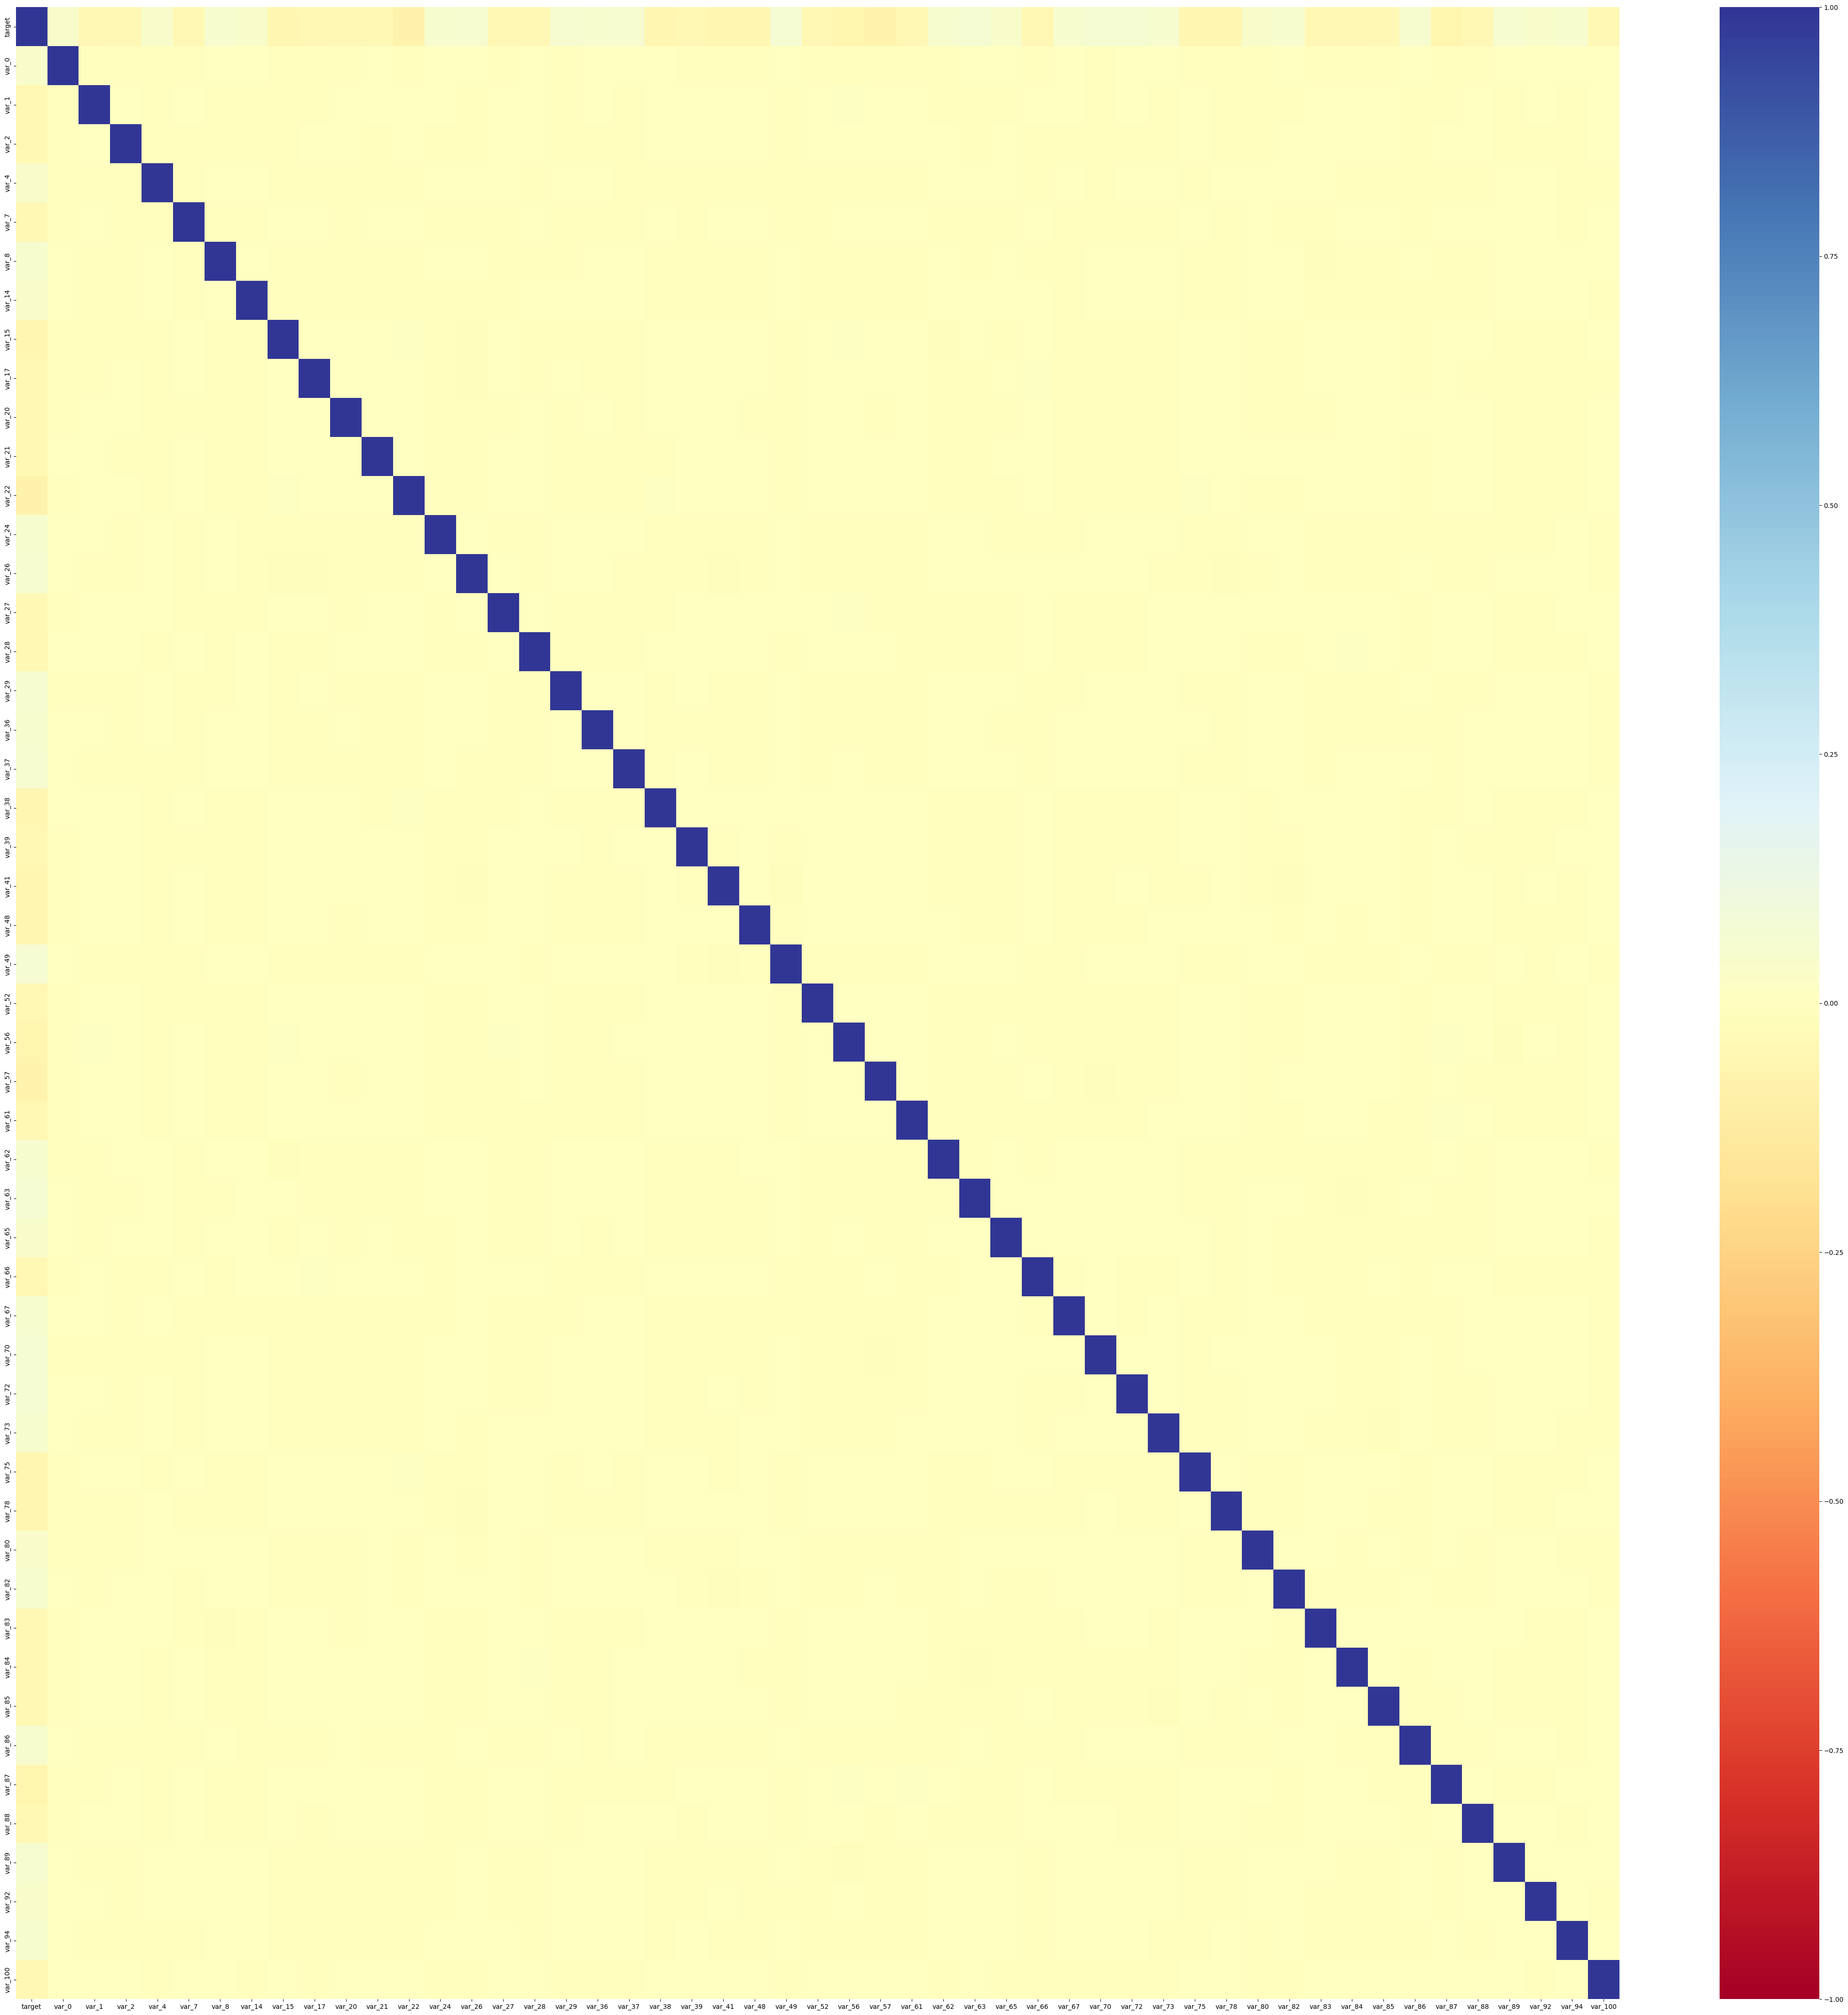

In [37]:
#Correlation plot shows relationship between "target" and other variables.
#We see values very close to 0, which indicates low correlation.
#In other words, they are independent of each other.

corr = train.select_dtypes(include='number').corr()
plt.figure(figsize=(55,55))
sns.heatmap(corr, cmap='RdYlBu', vmin = -1, vmax = 1);

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_4'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>],
       [<Axes: title={'center': 'var_14'}>,
        <Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21'}>,
        <Axes: title={'center': 'var_22'}>,
        <Axes: title={'center': 'var_24'}>],
       [<Axes: title={'center': 'var_26'}>,
        <Axes: title={'center': 'var_27'}>,
        <Axes: title={'center': 'var_28'}>,
        <Axes: title={'center': 'var_29'}>,
        <Axes: title={'center': 'var_36'}>,
        <Axes: title={'center': 'var_37'}>,
        <Axes: title={'center': 'var_38'}>],
       [<Axes: title={'center': 'var_39'}>,
        <Axes: title={'center': 'va

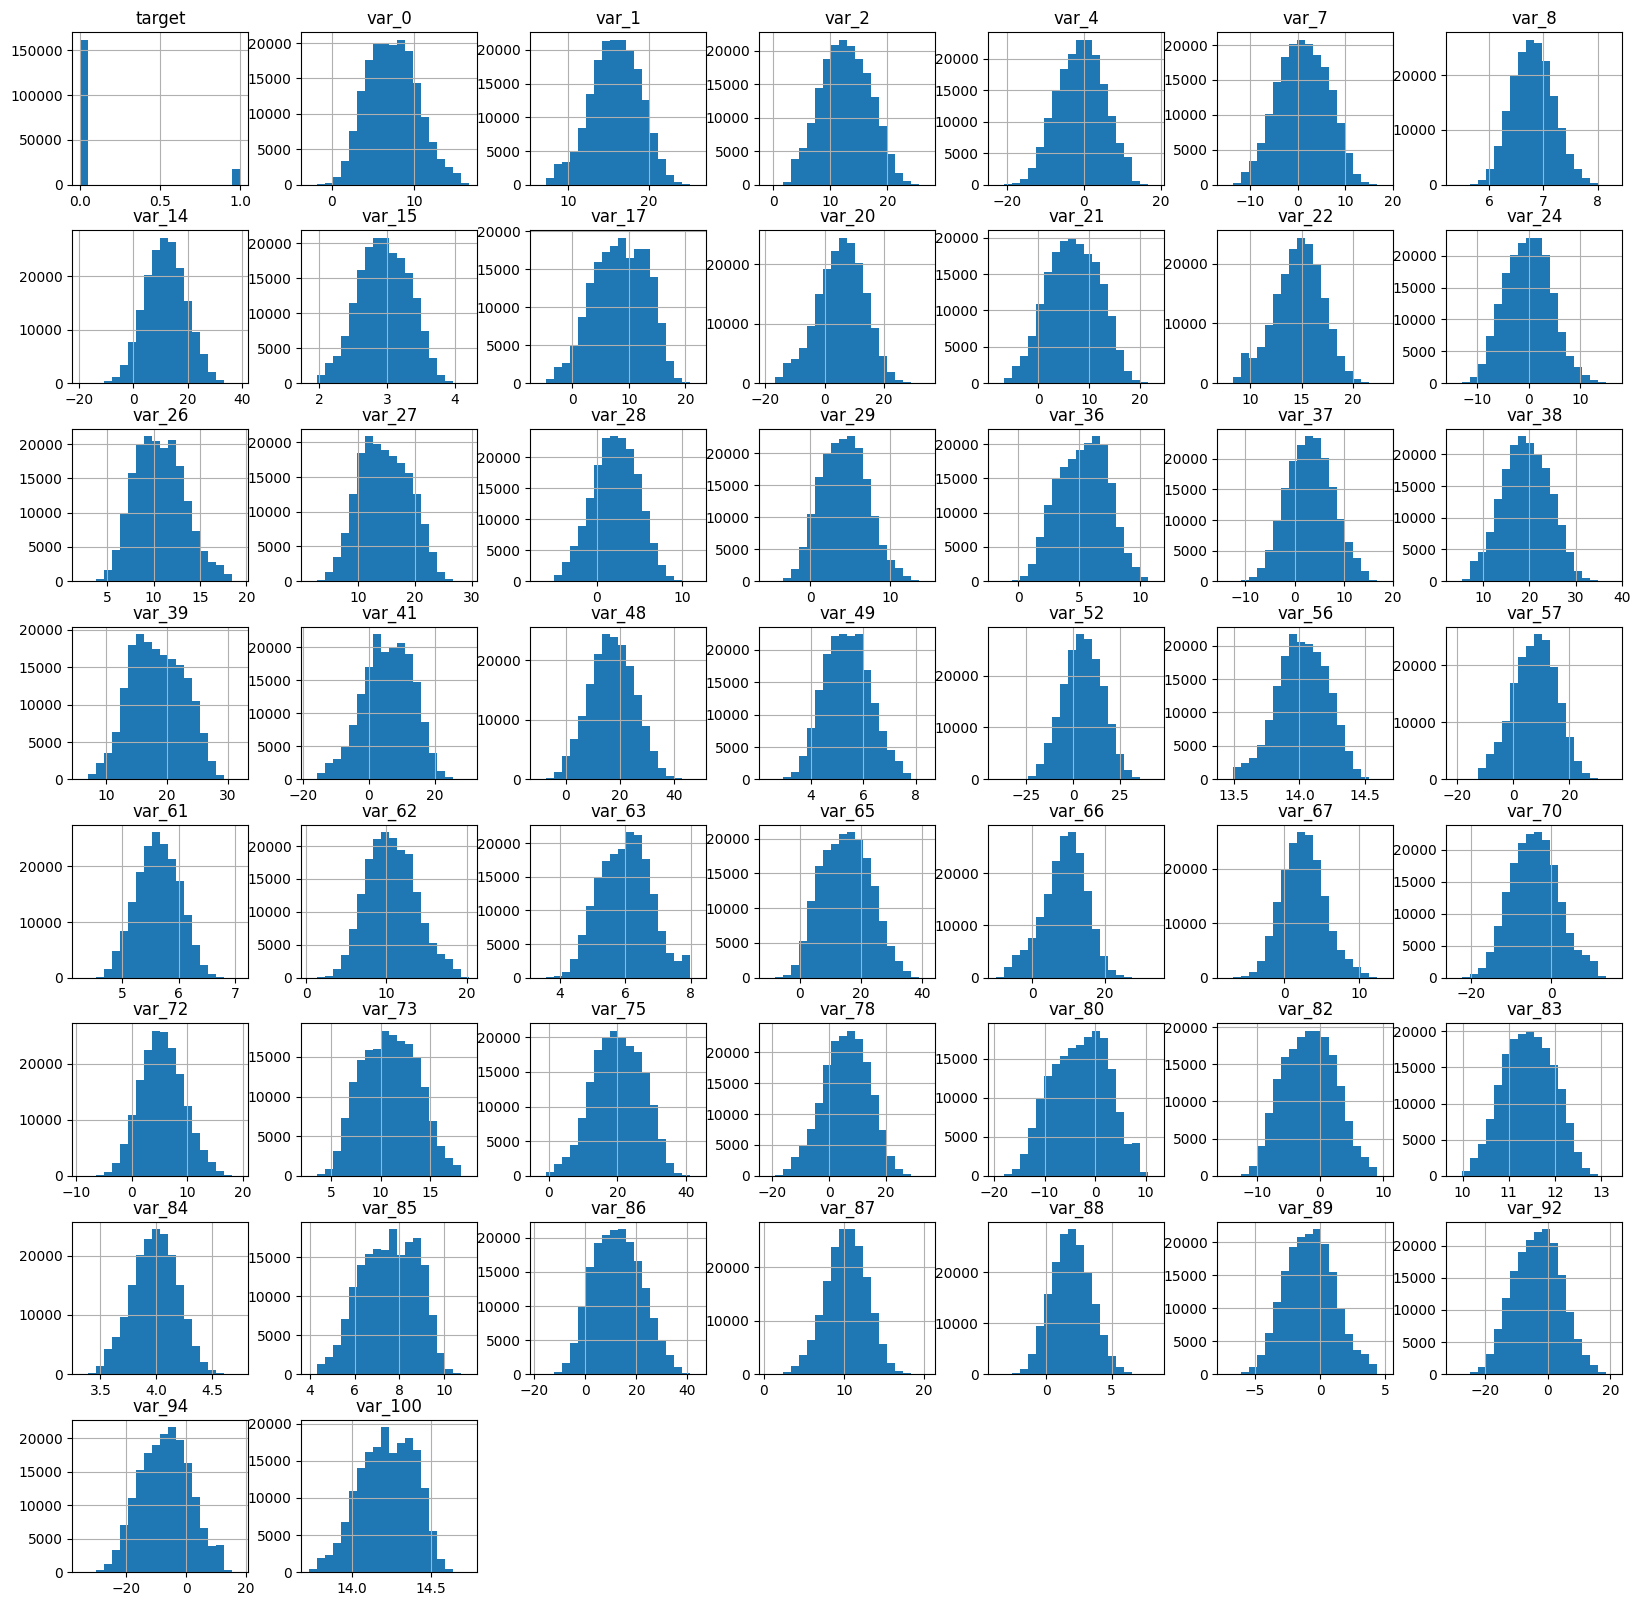

In [38]:
# Histogram Grid shows distribution of the data across the data set variables.
# This shows mostly nice bell curves, which indicates normal distribution.
# (With exception of the target variable of course.)
train.hist(figsize=(20,20), bins=20)

In [39]:
train.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [40]:
train.size

9180000

In [41]:
train.shape

(180000, 51)

##Data Processing
>  "Crunch Numbers"

It is important to split the data to perform Gaussian Naive Bayes model.  So, we start by splitting a portion of the data.

1.   First we separate the target data into the two variables,
*   1 - Yes (The Customer did purchase the product)
*   0 - No  (The Customer did not purchase the product)

2.  Now, we need to remove the target from the rest of the data used to create the predictive model.
*   X - Rest of the Data
*   y - Target Data

3.  

In [117]:
# the split begins...
# Split the data into two sets;
# "Did Purchase" (Target = 1) and "Did Not Purchase" (Target = 0).
train_1 = train[train['target'] == 1]
train_0 = train[train['target'] == 0]
train_1.head(), train_0.head()

(     target   var_0    var_1    var_2    var_4    var_7   var_8   var_14  \
 57      1.0  8.9078  12.1321   9.4707  -5.8102   0.4521  7.1264  15.6935   
 125     1.0  6.2143  20.0990  23.5009  -0.8917  -3.9167  6.6863  21.4162   
 151     1.0  8.9083  12.1117  18.0359  -4.9628  10.1135  6.8962  11.4553   
 155     1.0  6.5612  13.9638   5.1980  12.1092   8.4874  6.4781  16.9541   
 302     1.0  4.4616   9.7572  12.9317   7.6485   0.6382  5.8025  22.4577   
 
      var_15   var_17  ...   var_83  var_84  var_85   var_86   var_87  var_88  \
 57   2.6980   4.3336  ...  11.2059  4.0237  5.8905  12.4865  10.1419  2.3370   
 125  2.8672   6.4550  ...  10.8110  3.9190  7.4971  35.7428   9.6149  2.2257   
 151  2.6735   2.1990  ...  11.6326  3.9193  5.0366  37.1453  17.0341  0.9987   
 155  2.0573   5.5008  ...  11.2981  4.1316  7.2193  -1.8139   1.8190  2.5720   
 302  3.0906  16.2501  ...  11.5449  4.0001  9.0639  11.8805   9.4678  1.0561   
 
      var_89   var_92   var_94  var_100  
 57  -

In [115]:
# Now we set data from Target in a separate value set.
y = train['target']
y.value_counts()


,count
target,
0.0,161960
1.0,18040


In [44]:
# Now we set data from all the other variables in a separate value.
X = train.drop(columns='target')
X

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,0.5878,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,6.5456,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,18.7893,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,1.1400,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,7.8002,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,3.1549,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,3.9661,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,3.8858,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,2.0014,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
X_train, X_test, y_train, y_test

(           var_0    var_1    var_2    var_4   var_7   var_8   var_14  var_15  \
 52921    11.6590  16.9409  18.9382  10.2871  4.5281  6.5839   7.5261  2.9233   
 340954    7.9360  18.9734  13.2990   1.5649 -1.5887  6.6148   3.9875  3.3772   
 917722   11.6883  14.7314  10.9512   3.6018 -1.1972  6.4599  -5.1767  3.0628   
 35788     8.3487  17.0831   9.5062  -2.1904  0.8256  7.1946   7.1987  2.3715   
 655969    9.5059  15.0808   9.9741   1.9580 -6.9709  6.5204  17.9815  2.5103   
 ...          ...      ...      ...      ...     ...     ...      ...     ...   
 861601    4.8227  19.9481   9.7743   2.8185 -0.5823  7.1467   0.7321  3.0549   
 483056    1.1730  17.9136   7.1386   1.1141  5.1515  6.6304   9.3522  2.8682   
 173021    2.9492  21.5498  13.3308  -9.0061 -2.5924  6.8451   5.9499  2.9061   
 1010344   2.4780  17.8193   9.5998  -1.1325  9.5983  6.5100  24.7985  2.7427   
 450777    7.9940  18.2556  17.8820  -4.2465  6.6723  6.6946   7.3164  2.6512   
 
           var_17   var_20

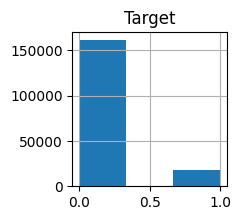

In [46]:
#This histogram illustrates that target value data count is very lopsided.

train['target'].hist(figsize=(2,2), bins=3)
plt.title('Target') ;

In [47]:
y_train.size


144000

In [48]:
y_test.size


36000

In [49]:
gnb = GaussianNB()

In [50]:
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [52]:
y_test.values

array([0., 0., 1., ..., 0., 1., 0.])

In [53]:
(y_pred - y_test).values * 100

array([   0.,    0., -100., ...,    0.,    0.,    0.])

In [54]:
(y_pred - y_test).abs().sum()

np.float64(3225.0)

In [55]:
#accuracy of how many you got right compared to whole.
(1-(y_pred - y_test).abs().mean())*100

np.float64(91.04166666666667)

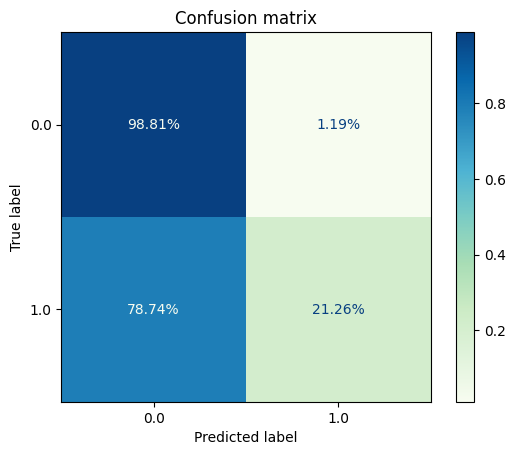

In [56]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;


In [57]:
results = []
for i in range(500):
  # train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

  # initialize model
  gnb = GaussianNB()

  # fit model
  gnb.fit(X_train, y_train)

  # predict
  y_pred = gnb.predict(X_test)

  # performance & record
  results.append( (1-(y_pred - y_test).abs().mean())*100 )

In [58]:
results

[np.float64(90.97222222222221),
 np.float64(91.14722222222223),
 np.float64(91.05833333333334),
 np.float64(91.15277777777779),
 np.float64(91.35),
 np.float64(91.09166666666667),
 np.float64(91.13333333333333),
 np.float64(91.14722222222223),
 np.float64(91.20555555555555),
 np.float64(91.22777777777777),
 np.float64(91.07222222222222),
 np.float64(91.14722222222223),
 np.float64(90.95277777777778),
 np.float64(91.16944444444445),
 np.float64(91.19166666666668),
 np.float64(91.31944444444444),
 np.float64(91.10277777777777),
 np.float64(90.97222222222221),
 np.float64(91.27777777777779),
 np.float64(91.28055555555555),
 np.float64(91.09166666666667),
 np.float64(91.17500000000001),
 np.float64(91.05555555555556),
 np.float64(91.02777777777777),
 np.float64(91.27222222222223),
 np.float64(91.15833333333333),
 np.float64(91.06111111111112),
 np.float64(91.10000000000001),
 np.float64(91.08333333333334),
 np.float64(90.95277777777778),
 np.float64(91.02222222222223),
 np.float64(91.17777

Text(0, 0.5, 'Score Counts')

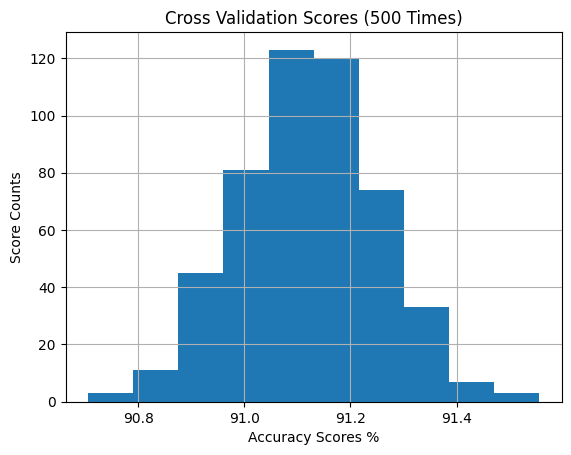

In [59]:

pd.Series(results).hist()
plt.title("Cross Validation Scores (500 Times)")
plt.xlabel("Accuracy Scores %")
plt.ylabel("Score Counts")

In [60]:
corr =train.corr()
corr

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
target,1.000000,0.045506,-0.051718,-0.046433,0.041593,-0.041987,0.052457,0.045281,-0.057373,-0.054375,...,-0.052324,-0.053733,-0.042073,0.047543,-0.063871,-0.042765,0.059306,0.040520,0.049072,-0.047005
var_0,0.045506,1.000000,-0.000892,-0.000225,-0.000269,-0.001320,0.002949,0.002901,-0.007758,-0.002799,...,-0.004960,-0.005451,-0.000716,0.004577,-0.004664,-0.001088,0.000236,0.001668,0.001837,0.001475
var_1,-0.051718,-0.000892,1.000000,0.006064,-0.000821,0.000783,-0.007127,-0.006180,-0.002585,-0.001663,...,0.004265,0.002411,0.001484,-0.003859,-0.000485,0.003141,-0.006188,0.000071,-0.003682,0.003964
var_2,-0.046433,-0.000225,0.006064,1.000000,-0.003427,-0.000108,-0.001809,-0.002786,-0.001177,0.006360,...,0.004890,0.002240,0.001980,-0.001161,0.003921,0.002087,-0.004422,-0.003418,-0.001565,0.002418
var_4,0.041593,-0.000269,-0.000821,-0.003427,1.000000,-0.002750,0.003347,0.001377,-0.004732,-0.001814,...,0.000657,-0.005267,-0.004266,-0.004179,-0.004211,-0.002330,0.000254,0.001090,-0.000468,-0.002807
var_7,-0.041987,-0.001320,0.000783,-0.000108,-0.002750,1.000000,-0.003199,-0.003588,0.002329,0.004282,...,-0.000412,0.003262,0.002574,-0.001824,0.001186,0.002811,0.001306,0.000236,-0.000568,0.004575
var_8,0.052457,0.002949,-0.007127,-0.001809,0.003347,-0.003199,1.000000,0.003472,-0.003858,-0.002727,...,-0.008394,-0.004254,-0.002446,0.001117,-0.003713,-0.003929,0.003837,0.003422,0.003204,0.000821
var_14,0.045281,0.002901,-0.006180,-0.002786,0.001377,-0.003588,0.003472,1.000000,-0.007115,-0.004249,...,-0.002214,-0.002179,-0.003054,-0.000160,-0.000504,-0.004046,0.003136,0.005715,0.001501,-0.000106
var_15,-0.057373,-0.007758,-0.002585,-0.001177,-0.004732,0.002329,-0.003858,-0.007115,1.000000,0.002467,...,0.000581,0.006633,0.004569,-0.001573,0.003251,0.003066,-0.001541,-0.003719,-0.002825,0.004247
var_17,-0.054375,-0.002799,-0.001663,0.006360,-0.001814,0.004282,-0.002727,-0.004249,0.002467,1.000000,...,0.005578,0.001237,0.000210,-0.002714,0.004149,-0.002182,-0.002642,-0.001968,-0.004100,-0.000822


In [61]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [62]:
accuracy_scores = cross_validate(X, y, 500)
print(round(accuracy_scores.mean(), 5))

0.91126


### Results from Initial Data Processing

After testing results, and seeing the target counts, we can see that the values are lopsided.  

**Confusion Matrix Results**
*   21.26% of Predicted Purchases
*   98.81% of Actual Purchases not made
*   78.74% of Falsely Predicted Purchases

We can further alter the data by balancing the target counts and see if that improves accuracy of our prediction model.



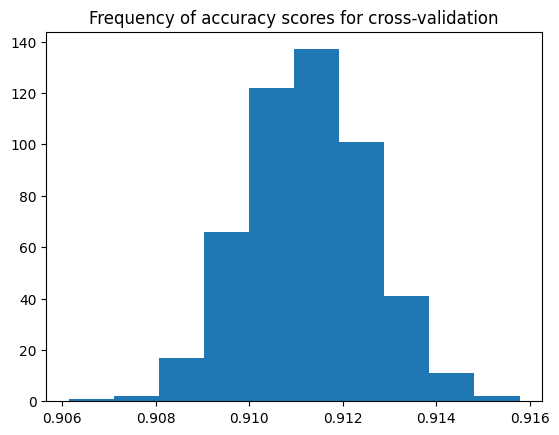

In [63]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

Text(0.5, 0, 'Score Counts')

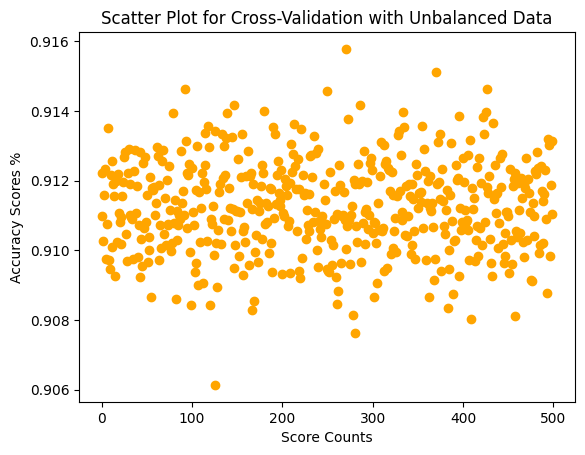

In [64]:
fig = plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(accuracy_scores, '.');
plt.plot(accuracy_scores, 'o', color='orange',)
plt.title('Scatter Plot for Cross-Validation with Unbalanced Data')
plt.ylabel("Accuracy Scores %")
plt.xlabel("Score Counts")

In [65]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     32460
         1.0       0.67      0.23      0.34      3540

    accuracy                           0.91     36000
   macro avg       0.80      0.61      0.65     36000
weighted avg       0.90      0.91      0.89     36000



In [66]:
train_1.shape

(18040, 51)

### Balance the Data Set

We can match the amount of data from Yes and No of Target and run another prediction model using a newly balanced data set.

In [67]:
#Match the qty of rows of train 1 (Yes) dataFrame to train 0 (No), and take a random sample of that quantity.
n_rows = train_1.shape[0]
train_0 = train_0.sample(n_rows)
train_0

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
247382,0.0,9.2204,13.8574,11.2524,-9.3002,-2.4158,6.9506,9.0712,3.0909,6.0237,...,12.3379,4.1455,9.4335,-0.8429,11.5396,3.7012,3.8868,-6.7479,-24.2322,14.2639
866599,0.0,1.0545,19.4484,4.9216,8.9947,1.0826,6.5063,16.2837,2.7707,3.6347,...,11.4370,3.5336,6.5181,-3.8510,9.7134,3.1516,-2.3638,-1.2639,-10.2899,14.0281
687488,0.0,5.3205,13.6316,8.1596,-4.6265,5.7342,7.1036,10.6324,2.7244,3.4571,...,11.3560,4.1041,6.0998,14.0778,13.4074,2.9064,-0.1235,10.3186,-6.4052,14.2003
611574,0.0,4.1689,17.2381,15.7971,2.0390,-3.0227,6.9661,17.5155,2.6002,9.8095,...,12.0981,4.2361,5.5033,12.8988,10.8767,1.3561,-3.3648,0.9384,-3.2656,14.3355
323043,0.0,7.0898,13.9842,5.8746,3.7233,7.4879,7.0830,13.6089,2.5520,14.4657,...,11.2188,4.1683,5.8136,18.3124,10.6715,4.1184,-1.2727,-11.8444,-8.6061,14.2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001132,0.0,4.7407,14.5413,15.0709,-2.7262,-2.7192,6.9316,11.7668,2.8654,10.3406,...,10.7302,4.0703,7.1752,12.5482,9.4966,1.5950,0.9202,-0.3838,-1.0172,14.2987
563946,0.0,3.6810,14.5518,8.7736,-3.4748,5.0632,6.6882,9.2330,3.0308,3.8310,...,10.8516,3.7995,8.9816,20.4399,10.5925,3.3184,3.7647,4.5625,-10.6918,14.0920
225816,0.0,10.7734,19.8046,20.5052,-5.0479,-6.7146,6.7824,14.3533,2.6375,12.6274,...,10.3180,4.1194,9.2942,26.5108,8.0929,1.6361,-1.2217,-5.3126,2.7648,14.3135
583207,0.0,9.3895,20.6196,17.1890,-2.1435,-0.5634,6.9878,7.0244,2.9425,11.7974,...,11.6767,3.9808,7.6496,27.6894,12.3085,4.0637,0.7438,-1.2412,1.2895,14.2525


In [68]:
# With our powers combined, we are a balanced data set!!!! (Combined train 1 and train 0)
frame = [train_1, train_0]
train_bal =pd.concat(frame)
train_bal

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
57,1.0,8.9078,12.1321,9.4707,-5.8102,0.4521,7.1264,15.6935,2.6980,4.3336,...,11.2059,4.0237,5.8905,12.4865,10.1419,2.3370,-3.1553,-12.6928,-3.0833,14.1895
125,1.0,6.2143,20.0990,23.5009,-0.8917,-3.9167,6.6863,21.4162,2.8672,6.4550,...,10.8110,3.9190,7.4971,35.7428,9.6149,2.2257,-0.5949,-9.4101,-15.6555,14.4514
151,1.0,8.9083,12.1117,18.0359,-4.9628,10.1135,6.8962,11.4553,2.6735,2.1990,...,11.6326,3.9193,5.0366,37.1453,17.0341,0.9987,-3.0163,-1.5409,-7.6389,14.1725
155,1.0,6.5612,13.9638,5.1980,12.1092,8.4874,6.4781,16.9541,2.0573,5.5008,...,11.2981,4.1316,7.2193,-1.8139,1.8190,2.5720,0.6780,6.4045,1.1754,14.1347
302,1.0,4.4616,9.7572,12.9317,7.6485,0.6382,5.8025,22.4577,3.0906,16.2501,...,11.5449,4.0001,9.0639,11.8805,9.4678,1.0561,-0.2107,9.8815,-2.9328,14.0933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001132,0.0,4.7407,14.5413,15.0709,-2.7262,-2.7192,6.9316,11.7668,2.8654,10.3406,...,10.7302,4.0703,7.1752,12.5482,9.4966,1.5950,0.9202,-0.3838,-1.0172,14.2987
563946,0.0,3.6810,14.5518,8.7736,-3.4748,5.0632,6.6882,9.2330,3.0308,3.8310,...,10.8516,3.7995,8.9816,20.4399,10.5925,3.3184,3.7647,4.5625,-10.6918,14.0920
225816,0.0,10.7734,19.8046,20.5052,-5.0479,-6.7146,6.7824,14.3533,2.6375,12.6274,...,10.3180,4.1194,9.2942,26.5108,8.0929,1.6361,-1.2217,-5.3126,2.7648,14.3135
583207,0.0,9.3895,20.6196,17.1890,-2.1435,-0.5634,6.9878,7.0244,2.9425,11.7974,...,11.6767,3.9808,7.6496,27.6894,12.3085,4.0637,0.7438,-1.2412,1.2895,14.2525


In [69]:
#Separate target and the rest of the columns.
X = train_bal.drop(columns='target')
X
y = train_bal['target']
y

,target
57,1.0
125,1.0
151,1.0
155,1.0
302,1.0
...,...
1001132,0.0
563946,0.0
225816,0.0
583207,0.0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_test, y_train, y_test

(          var_0    var_1    var_2    var_4   var_7   var_8   var_14  var_15  \
 454928   4.6995  20.7612   9.8722   9.4949 -4.2563  7.8553  -4.3935  3.1973   
 226168  12.3472  14.7622  15.7263   6.8421  2.5986  6.9948  20.7222  3.0504   
 562291   4.7248  15.4901  11.4821 -11.0058  6.8567  6.0101  17.0943  2.6368   
 142522  15.5697  19.9020  12.9538   4.7967 -0.3210  7.4664   9.7185  2.8427   
 225023   9.0804  15.2047  19.7121  -7.9270 -4.9898  6.9554  14.2039  2.9940   
 ...         ...      ...      ...      ...     ...     ...      ...     ...   
 961298   6.6140  21.1649  15.6628  -1.8591 -0.9307  7.1531  13.5438  3.1640   
 646841   8.3400  19.2661  14.6728   3.6347 -3.8215  6.1042  10.2914  3.1224   
 928449   8.1031  20.4491  17.3408   2.8634  9.0884  6.7032  28.9868  2.6807   
 686129   6.5293  16.9014  17.2995   9.8138  6.7878  6.2360  13.0994  3.0883   
 163437   9.1576  19.4606  22.2311   6.9241 -0.0224  7.3188  18.7337  2.0691   
 
          var_17   var_20  ...   var_8

Text(0, 0.5, 'Value Count')

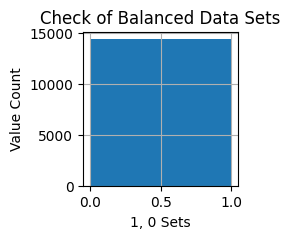

In [71]:
#Visual check of how balanced test and train data sets
y_train.hist(figsize=(2,2), bins=2)
plt.title("Check of Balanced Data Sets")
plt.xlabel("1, 0 Sets")
plt.ylabel("Value Count")

After we established that there is a numerically balanced set, it's time to crunch numbers again.  Peanuts.

In [72]:
gnb = GaussianNB()

In [73]:
gnb.fit(X_train, y_train)

GaussianNB()

In [74]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 1., ..., 1., 1., 0.])

In [75]:
y_test.values

array([0., 0., 1., ..., 1., 1., 1.])

In [76]:
(y_pred - y_test).values * 100

array([   0.,    0.,    0., ...,    0.,    0., -100.])

In [77]:
(y_pred - y_test).abs().sum()

np.float64(1793.0)

In [78]:
#accuracy of how many you got right compared to whole.
(1-(y_pred - y_test).abs().mean())*100

np.float64(75.15243902439023)

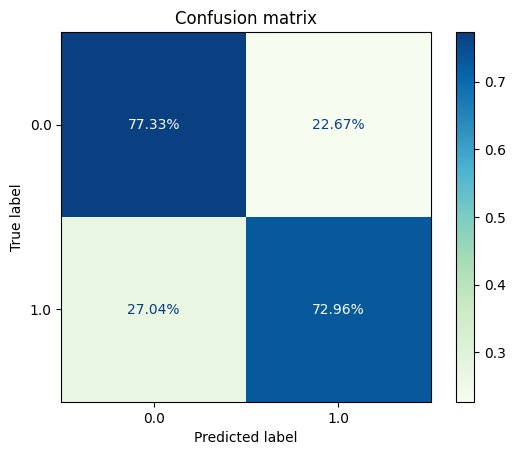

In [79]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;


In [80]:
results = []
for i in range(500):
  # tts
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

  # init model
  gnb = GaussianNB()

  # fit model
  gnb.fit(X_train, y_train)

  # predict
  y_pred = gnb.predict(X_test)

  # performance & record
  results.append( (1-(y_pred - y_test).abs().mean())*100 )

In [81]:
accuracy_scores_bal = cross_validate(X, y, 100)
print(round(accuracy_scores_bal.mean(), 5))

0.75576


In [82]:
results

[np.float64(75.18015521064302),
 np.float64(75.49889135254989),
 np.float64(75.51274944567628),
 np.float64(75.3048780487805),
 np.float64(75.60975609756098),
 np.float64(75.1940133037694),
 np.float64(75.60975609756098),
 np.float64(75.91463414634147),
 np.float64(75.08314855875831),
 np.float64(76.35809312638581),
 np.float64(75.55432372505544),
 np.float64(75.49889135254989),
 np.float64(75.81762749445676),
 np.float64(75.74833702882484),
 np.float64(75.41574279379158),
 np.float64(75.44345898004434),
 np.float64(75.06929046563194),
 np.float64(74.41796008869179),
 np.float64(75.47117516629712),
 np.float64(75.20787139689578),
 np.float64(75.67904656319291),
 np.float64(75.94235033259423),
 np.float64(75.12472283813747),
 np.float64(75.23558758314856),
 np.float64(75.22172949002217),
 np.float64(75.22172949002217),
 np.float64(74.91685144124169),
 np.float64(75.18015521064302),
 np.float64(75.84534368070953),
 np.float64(75.70676274944567),
 np.float64(75.20787139689578),
 np.float6

Text(0, 0.5, 'Score Counts')

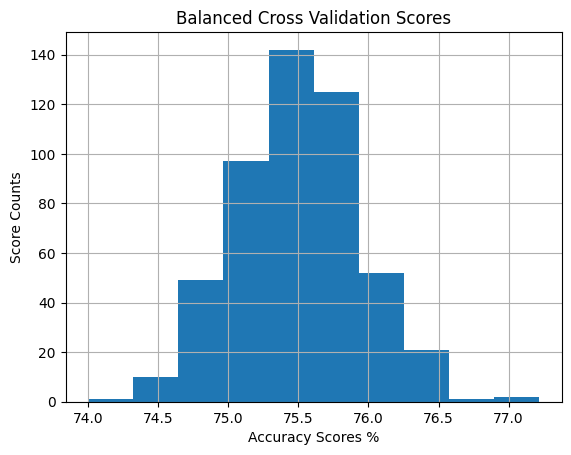

In [83]:
pd.Series(results).hist()
plt.title("Balanced Cross Validation Scores")
plt.xlabel("Accuracy Scores %")
plt.ylabel("Score Counts")

In [84]:
corr =train.corr()
corr

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
target,1.000000,0.045506,-0.051718,-0.046433,0.041593,-0.041987,0.052457,0.045281,-0.057373,-0.054375,...,-0.052324,-0.053733,-0.042073,0.047543,-0.063871,-0.042765,0.059306,0.040520,0.049072,-0.047005
var_0,0.045506,1.000000,-0.000892,-0.000225,-0.000269,-0.001320,0.002949,0.002901,-0.007758,-0.002799,...,-0.004960,-0.005451,-0.000716,0.004577,-0.004664,-0.001088,0.000236,0.001668,0.001837,0.001475
var_1,-0.051718,-0.000892,1.000000,0.006064,-0.000821,0.000783,-0.007127,-0.006180,-0.002585,-0.001663,...,0.004265,0.002411,0.001484,-0.003859,-0.000485,0.003141,-0.006188,0.000071,-0.003682,0.003964
var_2,-0.046433,-0.000225,0.006064,1.000000,-0.003427,-0.000108,-0.001809,-0.002786,-0.001177,0.006360,...,0.004890,0.002240,0.001980,-0.001161,0.003921,0.002087,-0.004422,-0.003418,-0.001565,0.002418
var_4,0.041593,-0.000269,-0.000821,-0.003427,1.000000,-0.002750,0.003347,0.001377,-0.004732,-0.001814,...,0.000657,-0.005267,-0.004266,-0.004179,-0.004211,-0.002330,0.000254,0.001090,-0.000468,-0.002807
var_7,-0.041987,-0.001320,0.000783,-0.000108,-0.002750,1.000000,-0.003199,-0.003588,0.002329,0.004282,...,-0.000412,0.003262,0.002574,-0.001824,0.001186,0.002811,0.001306,0.000236,-0.000568,0.004575
var_8,0.052457,0.002949,-0.007127,-0.001809,0.003347,-0.003199,1.000000,0.003472,-0.003858,-0.002727,...,-0.008394,-0.004254,-0.002446,0.001117,-0.003713,-0.003929,0.003837,0.003422,0.003204,0.000821
var_14,0.045281,0.002901,-0.006180,-0.002786,0.001377,-0.003588,0.003472,1.000000,-0.007115,-0.004249,...,-0.002214,-0.002179,-0.003054,-0.000160,-0.000504,-0.004046,0.003136,0.005715,0.001501,-0.000106
var_15,-0.057373,-0.007758,-0.002585,-0.001177,-0.004732,0.002329,-0.003858,-0.007115,1.000000,0.002467,...,0.000581,0.006633,0.004569,-0.001573,0.003251,0.003066,-0.001541,-0.003719,-0.002825,0.004247
var_17,-0.054375,-0.002799,-0.001663,0.006360,-0.001814,0.004282,-0.002727,-0.004249,0.002467,1.000000,...,0.005578,0.001237,0.000210,-0.002714,0.004149,-0.002182,-0.002642,-0.001968,-0.004100,-0.000822


In [85]:
accuracy_scores_bal = cross_validate(X, y, 500)
print(round(accuracy_scores_bal.mean(), 5))

0.75527


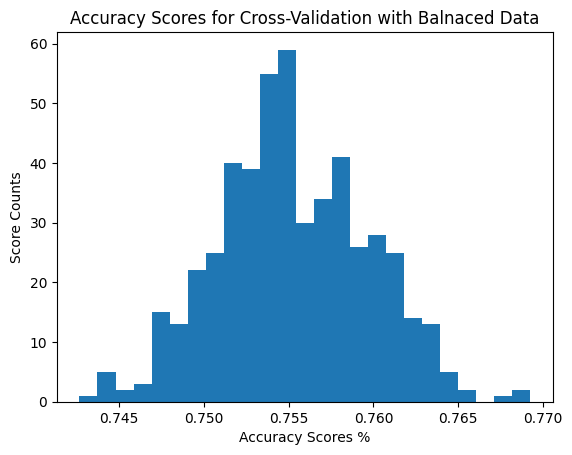

In [86]:
plt.hist(accuracy_scores_bal, bins=25)
plt.title('Accuracy Scores for Cross-Validation with Balnaced Data')
plt.xlabel("Accuracy Scores %")
plt.ylabel("Score Counts")
plt.show()


In [87]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      3622
         1.0       0.75      0.75      0.75      3594

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



## Data Visualization
> "Lets Plot"

So, our two prediction models using different data sets (Unbalanced and Balanced) can be seen below in a comparison scatter plot.  

The initial predictive model shows high accuracy of 91%, however it is unbalanced.  

When we re-run the results, it shows lower accuracy in predicting "Purchases Made", but a better job at predicting "Purchases Not Made", as well as ***reducing the False Positive predictions*** of "Purchases Made".

**Confusion Matrix of Balanced Results**
*   72.96% of Predicted Purchases
*   77.33% of Actual Purchases not made
*   27.04% of Falsely Predicted Purchases


Text(0.5, 0, 'Score Counts')

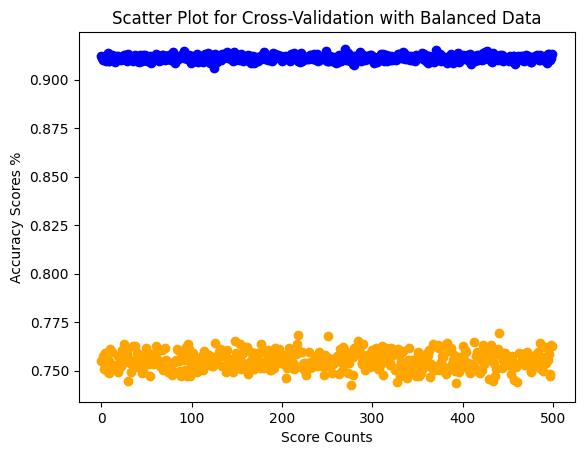

In [88]:
fig = plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(accuracy_scores, '.');
plt.plot(accuracy_scores, 'o', color='blue',)
plt.plot(accuracy_scores_bal, '.');
plt.plot(accuracy_scores_bal, 'o', color='orange',)

plt.title('Scatter Plot for Cross-Validation with Balanced Data')
plt.ylabel("Accuracy Scores %")
plt.xlabel("Score Counts")


## Communication of Results
> "What did we find?"

We created a prediction model to test whether customer will purchase items based on their data with average of 72% accuracy.